<a href="https://colab.research.google.com/github/SapphireAG/GDSC-task/blob/main/GDSC_Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


Kaggle credentials set.
Kaggle credentials successfully validated.


In [2]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

amangolani_gdsc_task_path = kagglehub.dataset_download('amangolani/gdsc-task')

print('Data source import complete.')


100%|██████████| 2.05k/2.05k [00:00<00:00, 2.49MB/s]

Extracting files...
Data source import complete.


In [3]:
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D,Flatten,Activation,BatchNormalization
from keras.layers import MaxPooling2D
import pandas as pd
import numpy as np
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [4]:
batch_size=32
num_classes=10
epochs=20
data_augmentation=False

In [5]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()
print("x_train shape ",x_train.shape)
print("y_train shape ",y_train.shape)
print("train samples ",x_train.shape[0])
print("test samples ",x_test.shape[0])

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 12s 0us/step
x_train shape  (50000, 32, 32, 3)
y_train shape  (50000, 1)
train samples  50000
test samples  10000


In [6]:
x_train=x_train.astype("float32")
x_test=x_test.astype("float32")
x_train/=255
x_test/=255
y_train=keras.utils.to_categorical(y_train,num_classes)
y_test=keras.utils.to_categorical(y_test,num_classes)


In [8]:
model=Sequential()

model.add(Conv2D(32,(3,3),padding='same',input_shape=x_train.shape[1:]))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(32,(3,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(64,(3,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 30, 30, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 30, 30, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 30, 30, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 15, 15, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 15, 15, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 15, 15, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 13, 13, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 13, 13, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 512)                 │              

 Total params: 1,253,674 (4.78 MB)

 Trainable params: 1,252,266 (4.78 MB)

 Non-trainable params: 1,408 (5.50 KB)

In [ ]:
opt=keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss='categorical_crossentropy',
             optimizer=opt,
             metrics=['accuracy'])

early_stopping=EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

In [ ]:
history = None  # For recording the history of trainning process.
if not data_augmentation:
    print('Not using data augmentation.')
    history = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              callbacks=[early_stopping],
              shuffle=True)

Not using data augmentation.
Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 118s 74ms/step - accuracy: 0.4059 - loss: 1.7441 - val_accuracy: 0.6199 - val_loss: 1.0675
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 118s 75ms/step - accuracy: 0.6337 - loss: 1.0451 - val_accuracy: 0.6875 - val_loss: 0.9152
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 120s 77ms/step - accuracy: 0.6841 - loss: 0.8939 - val_accuracy: 0.7103 - val_loss: 0.8212
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 119s 76ms/step - accuracy: 0.7218 - loss: 0.8044 - val_accuracy: 0.7047 - val_loss: 0.8582
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 125s 80ms/step - accuracy: 0.7463 - loss: 0.7285 - val_accuracy: 0.7426 - val_loss: 0.7515
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 117s 75ms/step - accuracy: 0.7598 - loss: 0.6840 - val_accuracy: 0.7555 - val_loss: 0.7150
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 141s 74ms/step - accuracy: 0.7744 - loss: 0.6439 - val_accuracy: 0.7419 - val_loss: 0.7496
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


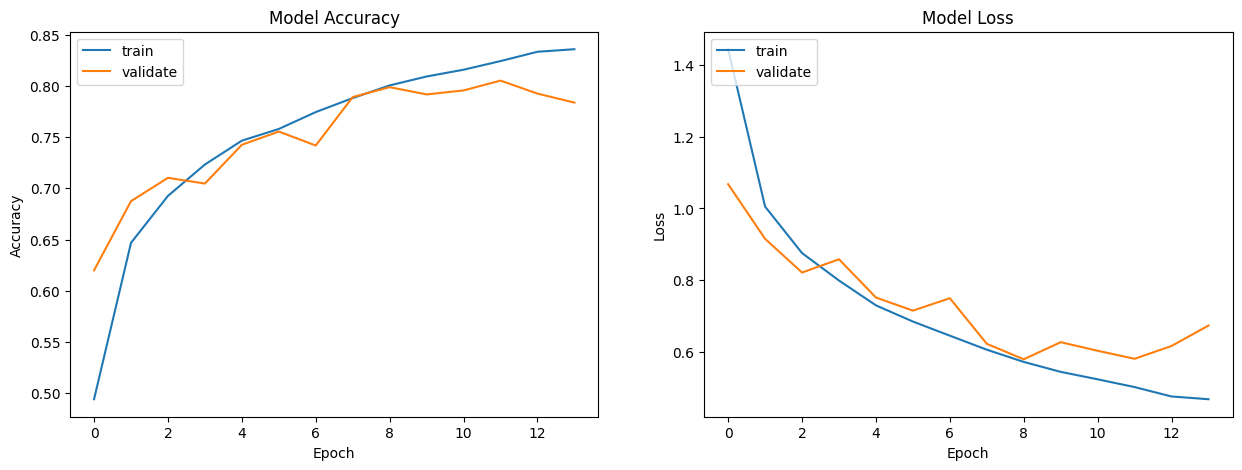

In [ ]:
def plotmodelhistory(history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))

    axs[0].plot(history.history['accuracy'])
    axs[0].plot(history.history['val_accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['train', 'validate'], loc='upper left')

    axs[1].plot(history.history['loss'])
    axs[1].plot(history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['train', 'validate'], loc='upper left')
    plt.show()

print(history.history.keys())

plotmodelhistory(history)

In [ ]:
scores=model.evaluate(x_test,y_test,verbose=1)
print("Test Loss: ",scores[0])
print("Test Accuracy ",scores[1])
pred=model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.8027 - loss: 0.5785
Test Loss:  0.5793656706809998
Test Accuracy  0.7989000082015991
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step


In [ ]:
Y_pred_classes=np.argmax(pred,axis=1)
Y_true=np.argmax(y_test,axis=1)
errors=(Y_pred_classes -Y_true!=0)


In [ ]:
print(classification_report(Y_true,Y_pred_classes))

              precision    recall  f1-score   support

           0       0.85      0.79      0.82      1000
           1       0.94      0.88      0.91      1000
           2       0.73      0.69      0.71      1000
           3       0.72      0.54      0.62      1000
           4       0.76      0.78      0.77      1000
           5       0.66      0.79      0.72      1000
           6       0.74      0.92      0.82      1000
           7       0.92      0.78      0.84      1000
           8       0.85      0.92      0.88      1000
           9       0.87      0.91      0.89      1000

    accuracy                           0.80     10000
   macro avg       0.80      0.80      0.80     10000
weighted avg       0.80      0.80      0.80     10000



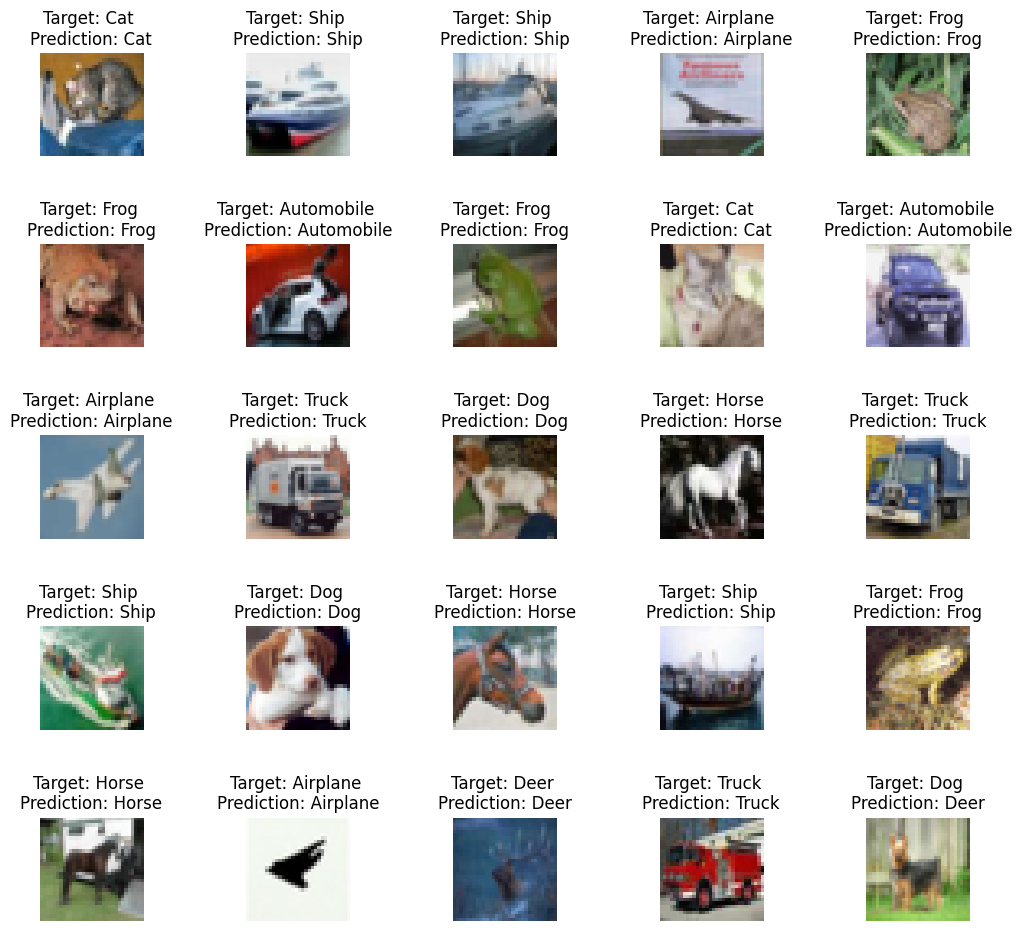

In [ ]:
labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
fig,axes=plt.subplots(5,5,figsize=(12,12))
axes=axes.ravel()
for i in np.arange(0,25):
    axes[i].imshow(x_test[i])
    axes[i].set_title("Target: %s \nPrediction: %s"%(labels[Y_true[i]],labels[Y_pred_classes[i]]))
    axes[i].axis("off")
    plt.subplots_adjust(wspace=1)

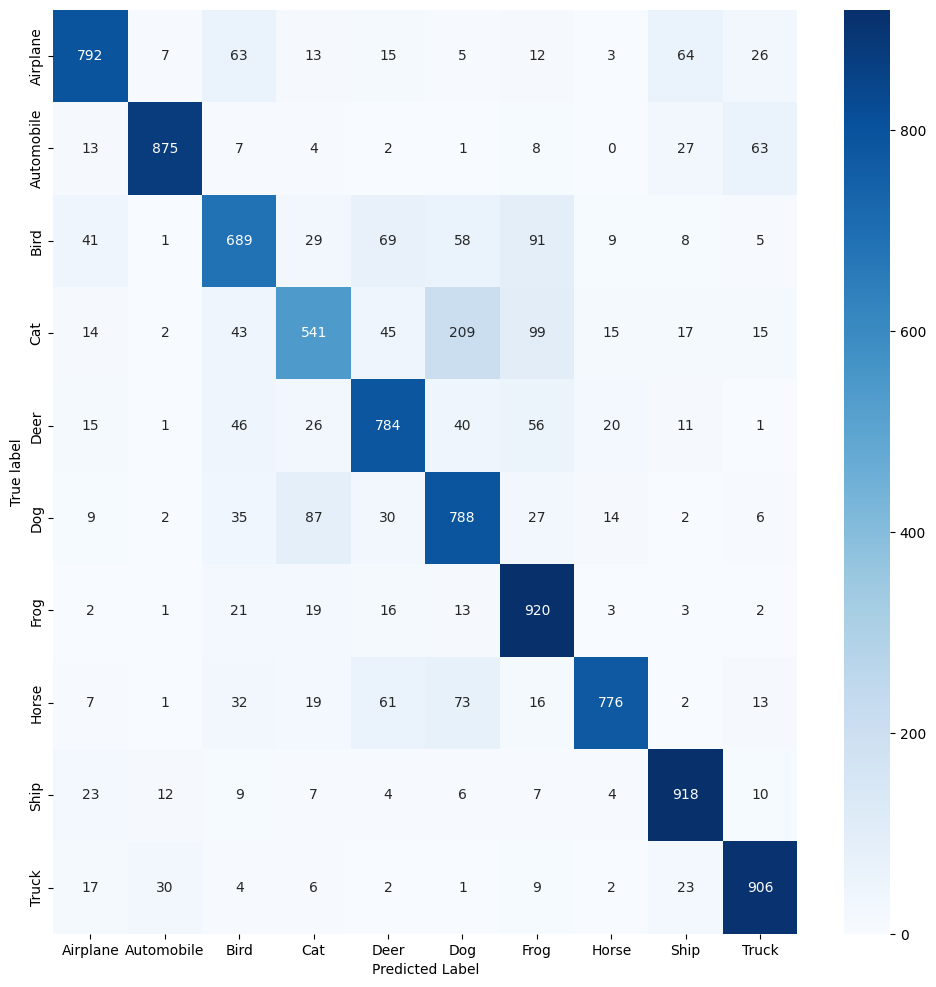

In [ ]:
Y_pred_classes_errors=Y_pred_classes[errors]
Y_pred_errors = pred[errors]
Y_true_errors = Y_true[errors]
X_test_errors=x_test[errors]
cm=confusion_matrix(Y_true,Y_pred_classes)
thresh=cm.max()/2
plt.figure(figsize=(12,12))
sns.heatmap(cm,annot=True,fmt="d",cmap="Blues",xticklabels=labels,yticklabels=labels)
plt.xlabel("Predicted Label")
plt.ylabel("True label")
plt.show()

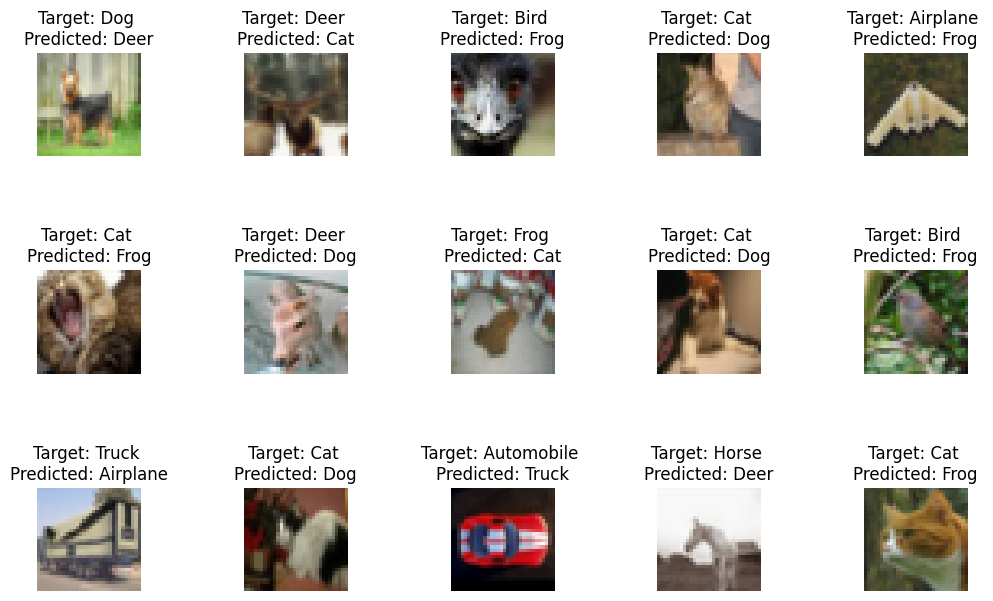

In [ ]:
R=3
C=5
fig,axs=plt.subplots(3,5,figsize=(12,8))
axs=axs.ravel()
misclassified_idx=np.where(Y_pred_classes!=Y_true)[0]
for i in np.arange(0,R*C):
    axs[i].imshow(x_test[misclassified_idx[i]])
    axs[i].set_title("Target: %s \nPredicted: %s"%(labels[Y_true[misclassified_idx[i]]],labels[Y_pred_classes[misclassified_idx[i]]]))
    axs[i].axis('off')
    plt.subplots_adjust(wspace=1)


In [7]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
import tensorflow as tf

def preprocess_dataset(x, y, batch_size=32):
    dataset = tf.data.Dataset.from_tensor_slices((x, y))

    # Resize images and apply VGG16 preprocessing
    dataset = dataset.map(lambda img, label: (
        preprocess_input(tf.image.resize(img, (224, 224))),  # Resize & preprocess
        label
    ), num_parallel_calls=tf.data.AUTOTUNE)

    dataset = dataset.batch(batch_size).prefetch(tf.data.AUTOTUNE)
    return dataset

# Apply preprocessing to datasets
train_dataset = preprocess_dataset(x_train, y_train, batch_size=32)
test_dataset = preprocess_dataset(x_test, y_test, batch_size=32)

# Load VGG16 without the top classification layer
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze convolutional layers

# Print summary to check model structure
base_model.summary()


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [8]:
model2=Sequential([
    base_model,
    Flatten(),
    Dense(256,activation='relu'),
    Dropout(0.5),
    Dense(10,activation='softmax')
])

In [9]:
model2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model2.fit(train_dataset,epochs=10,validation_data=test_dataset)

Epoch 1/10
 298/1563 ━━━━━━━━━━━━━━━━━━━━ 6:39:36 19s/step - accuracy: 0.0988 - loss: 2.7053

KeyboardInterrupt: 